## Лабораторная работа №4
### Исследование моделей размещения пользователей и распространения сигнала

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def draw_circle(x, y, r, color = 'red'):
    theta = np.linspace(0, 2*math.pi, 250)
    x_cir = x + r * np.cos(theta)
    y_cir = y + r* np.sin(theta)
    plt.plot(x_cir, y_cir, color)
    plt.plot(x, y, 'b.')
def draw_circles(points, r, color= 'r'):
    for i in range(len(points[0])):
        draw_circle(points[0][i], points[1][i], r, color)

In [3]:
def angle_between_points(x1, x2):
    return math.atan2(x2[1] - x1[1], x2[0] - x1[0])
def distance_between_points(x1, x2):
    return math.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)
def rotate_point(x, x0, alpha):
    x_new = x0[0] + (x[0] - x0[0]) * math.cos(alpha) - (x[1] - x0[1]) * math.sin(alpha)
    y_new = x0[1] + (x[0] - x0[0]) * math.sin(alpha) + (x[1] - x0[1]) * math.cos(alpha)
    return [x_new, y_new]

In [4]:
def rectangle_between_points(x1, x2, r):
    d = distance_between_points(x1, x2)
    alpha = angle_between_points(x1,x2)
    A = rotate_point([x1[0], x1[1] - r], x1, alpha)
    B = rotate_point([x1[0], x1[1] + r], x1, alpha)
    C = rotate_point([x1[0] + d, x1[1] + r], x1, alpha)
    D = rotate_point([x1[0] + d, x1[1] - r], x1, alpha)
    return [A, B, C, D]
def draw_rectangle(points, color='r--'):
    A, B, C, D = points
    xs = [A[0], B[0], C[0], D[0], A[0]]
    ys = [A[1], B[1], C[1], D[1], A[1]]
    plt.plot(xs, ys, color)

In [5]:
def line_eq(x1, x2):
    A = x2[1] - x1[1]
    B = x1[0] - x2[0]
    C = x2[0] * x1[1] - x1[0] * x2[1]
    return [A,B,C]
def norm_to_line(x, line):
    A, B, C = line
    d = abs(A * x[0] + B * x[1] + C)
    d = d / math.sqrt(A * A + B * B)
    return d

In [6]:
def is_crosses(circle_center, r, los_eq):
    d = norm_to_line(circle_center, los_eq)
    return d <= r

def checker(rect, circle_center):
    A, B, C, D = rect
    max_x = max(A[0], B[0], C[0], D[0])
    min_x = min(A[0], B[0], C[0], D[0])
    max_y = max(A[1], B[1], C[1], D[1])
    min_y = min(A[1], B[1], C[1], D[1])
    if (circle_center[0] > max_x or circle_center[0] < min_x) and (circle_center[1] > max_y or circle_center[1] < min_y):
        return False
    else:
        return True

def signal_is_blocked(blockators, r, sender, reciver):
    A, B, C, D = rectangle_between_points(sender, reciver, r)
    c = 0
    for i in range(len(blockators[0])):
        center = [blockators[0][i], blockators[1][i]]
        if checker([A,B, C, D], center) and is_crosses(center, r, los_eq):
            return True
    return False

In [7]:
def poisson_point_process(A, lambda_):
    N = np.random.poisson(lambda_ * A**2)
    x = np.random.uniform(0, A, size = N)
    y = np.random.uniform(0, A, size = N)
    return [x, y]

In [8]:
def generate_reciver(center, r):
    alpha = np.random.uniform(0, 2 * math.pi)
    x = center[0] + r * math.cos(alpha)
    y = center[1] + r * math.sin(alpha)
    return [x, y]

In [9]:
def prob_of_blocking(A, q, r, d, N):
    counter = 0
    for i in range(N):
        sender = [np.random.uniform(0, area_size), np.random.uniform(0, area_size)]
        reciver = generate_reciver(sender, d)
        blockators = poisson_point_process(area_size, q)
        if signal_is_blocked(blockators, r, sender, reciver):
            counter += 1
    return counter / N
def theor_prob_of_blocking(r, d, q):
    S = 2 * r * d
    lambda_ = q * S
    tmp = math.e ** (-lambda_)
    return 1 - tmp

---

In [10]:
# Начальные параметры
area_size = 25
q = 0.3
r = 0.5
d = 5
sender = [np.random.uniform(0, area_size), np.random.uniform(0, area_size)]
reciver = generate_reciver(sender, d)

blockators = poisson_point_process(area_size, q)
los = rectangle_between_points(sender, reciver, r)
los_eq = line_eq(sender, reciver)

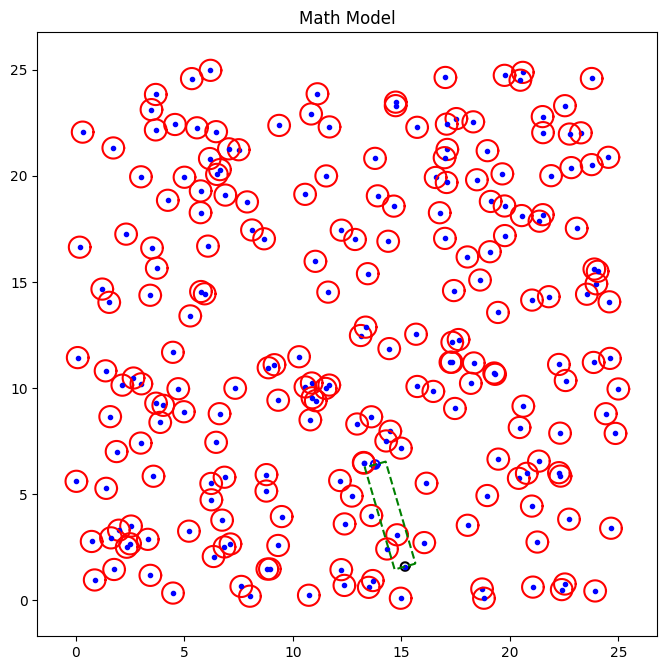

In [11]:
plt.figure(dpi=100, figsize=(8,8))
plt.title("Math Model")
draw_circle(sender[0], sender[1], 0.2, 'k')
draw_circle(reciver[0], reciver[1], 0.2, 'b')
draw_circles(blockators, r)
draw_rectangle(los, 'g--')

In [12]:
signal_is_blocked(blockators, r, sender, reciver)

True

---

In [13]:
N = 1000
counter = 0
for i in range(N):
    sender = [np.random.uniform(0, area_size), np.random.uniform(0, area_size)]
    reciver = generate_reciver(sender, d)
    blockators = poisson_point_process(area_size, q)
    if signal_is_blocked(blockators, r, sender, reciver):
        counter += 1
print("Вероятность блокировки: {}".format(counter/N))

Вероятность блокировки: 0.773


In [14]:
print("Теоретическая вероятность блокировки: {}".format(theor_prob_of_blocking(r, d, q)))

Теоретическая вероятность блокировки: 0.7768698398515701
